In [49]:
import pandas as pd
import numpy as np
from forecastflow.model import ARIMAForecastModel, SARIMAXForecastModel, LSTMForecastModel, ProphetForecastModel, \
    XGBoostForecastModel, TransformerForecastModel
from sklearn.preprocessing import MinMaxScaler

In [50]:
import importlib
import forecastflow
importlib.reload(forecastflow.model)
from forecastflow.model import ARIMAForecastModel, SARIMAXForecastModel, LSTMForecastModel, ProphetForecastModel, \
    XGBoostForecastModel, TransformerForecastModel

In [51]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data = data.astype('float32')

In [52]:
# Split data into train and test sets
train_size = int(len(data) * 0.7)
test_size = len(data) - train_size

In [53]:
# ARIMA model
arima_model = ARIMAForecastModel(order=(1, 1, 0))
arima_model.fit(data[:train_size])
arima_predictions = arima_model.predict(data.index[train_size], data.index[-1])
arima_mse = arima_model.evaluate(data, train_size, test_size)
print("ARIMA Mean Squared Error:", arima_mse)

C:\Users\wcyan\anaconda3\envs\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wcyan\anaconda3\envs\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wcyan\anaconda3\envs\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA Mean Squared Error: 11508.793175431318


C:\Users\wcyan\anaconda3\envs\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wcyan\anaconda3\envs\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wcyan\anaconda3\envs\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
# SARIMAX model
sarimax_model = SARIMAXForecastModel(order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
sarimax_model.fit(data[:train_size])
sarimax_predictions = sarimax_model.predict(data.index[train_size], data.index[-1])
sarimax_mse = sarimax_model.evaluate(data, train_size, test_size)
print("SARIMAX Mean Squared Error:", sarimax_mse)

C:\Users\wcyan\anaconda3\envs\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wcyan\anaconda3\envs\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX Mean Squared Error: 686.7476370938655


C:\Users\wcyan\anaconda3\envs\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wcyan\anaconda3\envs\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
# LSTM model
lstm_model = LSTMForecastModel(look_back=12, lstm_units=100, epochs=100, batch_size=10)
lstm_model.fit(data[:train_size])

# Scale data for the predict function
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data.values.reshape(-1, 1))

# Make predictions and calculate the mean squared error
lstm_predictions = lstm_model.predict(data, train_size, len(data) - 1, scaler)
lstm_mse = lstm_model.evaluate(data, train_size, test_size)
print("LSTM Mean Squared Error:", lstm_mse)


1/1 [==============================] - 0s 32ms/step
LSTM Mean Squared Error: 13192.638


In [56]:
# Prophet model
prophet_model = ProphetForecastModel()
prophet_model.fit(data[:train_size])
prophet_predictions = prophet_model.predict(data.index[train_size], data.index[-1])
prophet_mse = prophet_model.evaluate(data, train_size, test_size)
print("Prophet Mean Squared Error:", prophet_mse)

16:05:08 - cmdstanpy - INFO - Chain [1] start processing
16:05:08 - cmdstanpy - INFO - Chain [1] done processing
16:05:09 - cmdstanpy - INFO - Chain [1] start processing
16:05:09 - cmdstanpy - INFO - Chain [1] done processing


Prophet Mean Squared Error: 1754.9397453320357


In [57]:
# XGBoost model
xgb_model = XGBoostForecastModel(look_back=30, max_depth=10, n_estimators=100, learning_rate=0.1)
xgb_model.fit(data[:train_size])

# Make predictions and calculate the mean squared error
xgb_predictions = xgb_model.predict(data, train_size, len(data) - 1)
xgb_mse = xgb_model.evaluate(data, train_size, test_size)
print("XGBoost Mean Squared Error:", xgb_mse)

XGBoost Mean Squared Error: 5450.063


In [58]:
# Instantiate the model
transformer_model = TransformerForecastModel(
    look_back=12, num_layers=3, d_model=128, nhead=4, dim_feedforward=512, epochs=50, batch_size=1, learning_rate=0.001
)

# Fit the model
transformer_model.fit(data[:train_size])

# Make predictions and calculate the mean squared error
transformer_predictions = transformer_model.predict(data, train_size, len(data) - 1)
transformer_predictions_series = pd.Series(transformer_predictions.flatten(), index=data[train_size:].index)
mse = transformer_model.evaluate(data[train_size:], transformer_predictions)
print(f"Mean Squared Error: {mse}")


C:\Users\wcyan\anaconda3\envs\env\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Mean Squared Error: 14947.683865769457


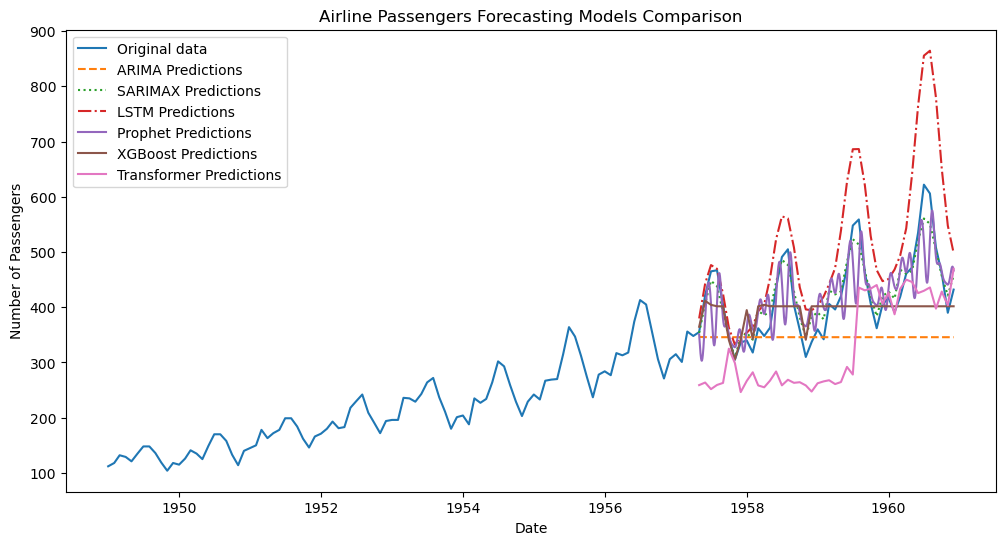

In [59]:
# Plot predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label="Original data")
plt.plot(arima_predictions.index, arima_predictions, label="ARIMA Predictions", linestyle="--")
plt.plot(sarimax_predictions.index, sarimax_predictions, label="SARIMAX Predictions", linestyle=":")
plt.plot(lstm_predictions.index, lstm_predictions, label="LSTM Predictions", linestyle="-.")
plt.plot(prophet_predictions.index, prophet_predictions, label="Prophet Predictions", linestyle="-")
plt.plot(xgb_predictions.index, xgb_predictions, label="XGBoost Predictions", linestyle="-")
plt.plot(transformer_predictions_series.index, transformer_predictions_series, label="Transformer Predictions", linestyle="-")
plt.legend(loc="best")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.title("Airline Passengers Forecasting Models Comparison")
plt.show()